<a href="https://colab.research.google.com/github/rehgend/EksplorasiHyperparameterCNN_NN/blob/main/Tugas%201B%20-%20Regresi%20Boston%20Housing%20Price%20dengan%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Tugas 1B - Regresi Boston Housing Price dengan ANN**
### **<center>Rahman Indra Kesuma - 33221026**
<br><br>

## **Tahapan 1.**
Memuat library yang dibutuhkan dalam pemrosesan data hingga proses pembelajaran pada Dataset *Boston Housing Price* dengan menggunakan algoritma Artificial Neural Network.

In [22]:
# Library untuk kebutuhan pengaksesan dan pemrosesan awal data
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

# Library yang digunakan untuk membuat model dengan arsitektur ANN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

# Library yang digunakan untuk optimizer yang digunakan
from tensorflow.keras.optimizers import RMSprop

# Library untuk melakukan plotting terhasil hasil yang diperoleh
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap

## **Tahapan 2.**
Memuat dataset *Boston Housing Price* dari Keras Built-In Small Dataset sekaligus melakukan slip kembali untuk membagi testing data dan validation data, dan ditambilkan ukuran data dari tiap-tiap kategori.

In [2]:
(x_train, y_train), (x_remaining, y_remaining) = boston_housing.load_data(path="boston_housing.npz", test_split=0.3, seed=113)
x_valid, x_test, y_valid, y_test = train_test_split(x_remaining, y_remaining, test_size=0.5)

print("Ukuran Training Data -> ", len(x_train), "( Max_y : ",max(y_train)," & Min_y : ",min(y_train),")")
print("Ukuran Validation Data -> ", len(x_valid), "( Max_y : ",max(y_valid)," & Min_y : ",min(y_valid),")")
print("Ukuran Testing Data -> ", len(x_test), "( Max_y : ",max(y_test)," & Min_y : ",min(y_test),")")
print("TOTAL DATA = ", len(x_train)+len(x_valid)+len(x_test))

65536/57026 [==================================] - 0s 0us/step
Ukuran Training Data ->  354 ( Max_y :  50.0  & Min_y :  5.0 )
Ukuran Validation Data ->  76 ( Max_y :  50.0  & Min_y :  7.0 )
Ukuran Testing Data ->  76 ( Max_y :  50.0  & Min_y :  5.6 )
TOTAL DATA =  506


## **Tahapan 3**.
Pendefinisian fungsi untuk membentuk arsitektur ANN dengan parameter yang berubah yaitu:
1.   Jumlah Hidden Layer (*NumHiddenLayer*)
2.   Jumlah Hidden Neuron Per-Layer (*NumHiddenNeuronPerLayer*)
3.   Activation Function Per-Layer (*ActivationFuncPerLayer*)


In [3]:
def build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer):
  ann_model = Sequential()
  ann_model.add(Flatten())

  # Pendefinisian pada Hidden Layer
  for idx_layer in range(NumHiddenLayer):
    ann_model.add(Dense(NumHiddenNeuronPerLayer[idx_layer], activation=ActivationFuncPerLayer[idx_layer]))
    
  #Pendefinisian pada Outlut Layer
  ann_model.add(Dense(1, activation=ActivationFuncPerLayer[NumHiddenLayer]))
  
  return ann_model

## **Tahapan 4**.
Percobaan dalam pembentukan regression model dengan Base Model.

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 13)                0         
                                                                 
 dense_34 (Dense)            (None, 128)               1792      
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 57s 8s/step - loss: 20.1234 - mean_absolute_error: 20.1234 - val_loss: 18.9507 - val_mean_absolute_error: 18.9507
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 18.8540 - mean_absolute_error: 18.8540 - val_loss: 17.8941 - val_mean_absolute_

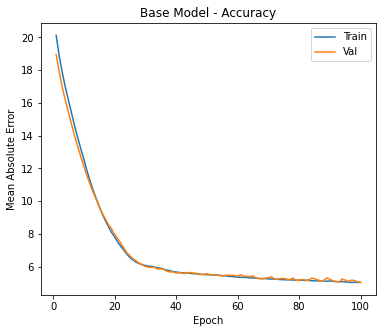

In [ ]:
#Nilai Dasar NumHiddenLayer = 1
#Nilai Dasar NumHiddenNeuronPerLayer = [128, ]
#Nilai Dasar ActivationFuncPerLayer = ['sigmoid', 'relu']

BATCH_SIZE = 50
EPOCHS = 100
Label_Epochs = []
for i in range(EPOCHS):
  Label_Epochs.append(i+1)

NumHiddenLayer = 1
NumHiddenNeuronPerLayer = [128]
ActivationFuncPerLayer = ['sigmoid','relu']

opt = RMSprop(learning_rate=0.001)

model_percobaan1 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
model_percobaan1.build((None, 13))
model_percobaan1.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model_percobaan1.summary()
History_Base_Training = model_percobaan1.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Penggunaan dari Kullback-Leibler Divergence Function
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(Label_Epochs, History_Base_Training.history['mean_absolute_error'])
plt.plot(Label_Epochs, History_Base_Training.history['val_mean_absolute_error'])
plt.title('Base Model - Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.savefig('BaseModel-Accuracy.jpg')
plt.show()

## **Tahapan 5**.
Percobaan ke-2 dilakukan untuk mencari jumlah hidden layer terbaik (1-5 hidden layer) dalam regression model dengan tahapan dimana setiap hidden layer memiliki 128 neuron dan menggunaan fungsi aktifasi Sigmoid

In [ ]:
#Nilai Pencarian NumHiddenLayer = 1, 2, 3, 4, 5
#Nilai Dasar NumHiddenNeuronPerLayer = [128, ..., 128]
#Nilai Dasar ActivationFuncPerLayer = ['sigmoid', ..., 'sigmoid', 'relu']

BATCH_SIZE = 50
EPOCHS = 80
opt = RMSprop(learning_rate=0.001)
History_NumHiddenLayer_Training = []

for JumHiddenLayer in range(5) :
  NumHiddenLayer = JumHiddenLayer+1 # Karena looping JumHiddenLayer dimulai dari 0  

  # Pendefinisian Jumlah Hidden Neuron pada Setiap Layer dengan 128
  NumHiddenNeuronPerLayer = []
  for idx in range(NumHiddenLayer) :
    NumHiddenNeuronPerLayer.append(128)

  # Pendefinisian Fungsi Aktifasi Sigmoid di Hidden Layer dan Relu pada Output Layer
  ActivationFuncPerLayer = []
  for idx in range(NumHiddenLayer) :
    ActivationFuncPerLayer.append('sigmoid')
  ActivationFuncPerLayer.append('relu')

  model_percobaan2 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
  model_percobaan2.build((None, 13))
  model_percobaan2.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
  model_percobaan2.summary()
  Temp_Hasil = model_percobaan2.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)
  History_NumHiddenLayer_Training.append(Temp_Hasil)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 13)                0         
                                                                 
 dense_80 (Dense)            (None, 128)               1792      
                                                                 
 dense_81 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
8/8 [==============================] - 1s 22ms/step - loss: 21.7202 - mean_absolute_error: 21.7202 - val_loss: 21.2723 - val_mean_absolute_error: 21.2723
Epoch 2/80
8/8 [==============================] - 0s 6ms/step - loss: 19.7992 - mean_absolute_error: 19.7992 - val_loss: 19.6468 - val_mean_absolute_e

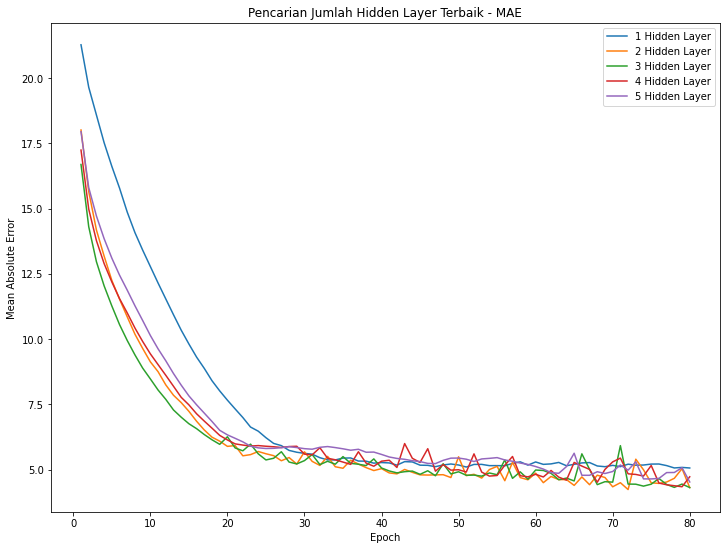

In [ ]:
# Visualisasi Hasil Pembentukan Model terhadap Kinerja pada Validation Data
Label_Epochs = []
for i in range(EPOCHS):
  Label_Epochs.append(i+1)

plt.rcParams['figure.figsize'] = (12.0, 9.0)
for idx in range(5) :
  plt.plot(Label_Epochs, History_NumHiddenLayer_Training[idx].history['val_mean_absolute_error'])
plt.title('Pencarian Jumlah Hidden Layer Terbaik - MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['1 Hidden Layer', '2 Hidden Layer', '3 Hidden Layer', '4 Hidden Layer', '5 Hidden Layer'])
plt.savefig('PencarianJumlahHiddenLayerTerbaik-MAE.jpg')
plt.show()

## **Tahapan 5**.
Percobaan ke-3 dilakukan untuk mencari jumlah hidden neuron terbaik dari setiap Hidden Layer (16, 32, 64, 128, 256) dalam regression model. Acuan yang digunakan adalah penggunaan jumlah hidden layer terbaik (dari percobaan ke-2) sebanyak 2-3 hidden layer. Sehingga pada percobaan ke-3 ini akan dilakukan terlebih dahulu eksplorasi kombinasi jumlah hidden neuron pada penggunaan 2 hidden layer dalam arsitektur ANN yang didefinisikan. Masing-masing hidden layer masih menggunakan fungsi aktifasi Sigmoid.

In [16]:
#Nilai Terbaik NumHiddenLayer = 2
#Nilai Pencarian NumHiddenNeuronPerLayer = 16 | 32 | 64 | 128 | 256
#Nilai Dasar ActivationFuncPerLayer = ['sigmoid', 'sigmoid', 'relu']

BATCH_SIZE = 50
EPOCHS = 80
opt = RMSprop(learning_rate=0.001)
NumHiddenLayer = 2
ActivationFuncPerLayer = ['sigmoid', 'sigmoid', 'relu']
data_val_error = []

Var_NumHiddenNeuron = [16, 32, 64, 128, 256]

for NumNeuronLayer1 in Var_NumHiddenNeuron :
  data_val_error_perlayer1 = []
  for NumNeuronLayer2 in Var_NumHiddenNeuron :
    NumHiddenNeuronPerLayer = [NumNeuronLayer1, NumNeuronLayer2]
    model_percobaan3 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
    model_percobaan3.build((None, 13))
    model_percobaan3.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    model_percobaan3.summary()
    model_percobaan3.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)
    loss_val, acc_val = model_percobaan3.evaluate(x_valid, y_valid)
    data_val_error_perlayer1.append(loss_val)
  
  # Memasukkan data validation error (MAE) ke array penyimpanan error keseluruhan untuk setiap setting nilai pada Hidden Layer ke-1
  data_val_error.append(data_val_error_perlayer1)

dframe_val_error = pd.DataFrame(data_val_error, index =['16', '32', '64', '128', '256'], columns =['16', '32', '64', '128', '256'])
print(dframe_val_error)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
8/8 [==============================] - 1s 3ms/step - loss: 21.0796 - mean_absolute_error: 21.0796
Epoch 2/80
8/8 [==============================] - 0s 2ms/step - loss: 20.8236 - m

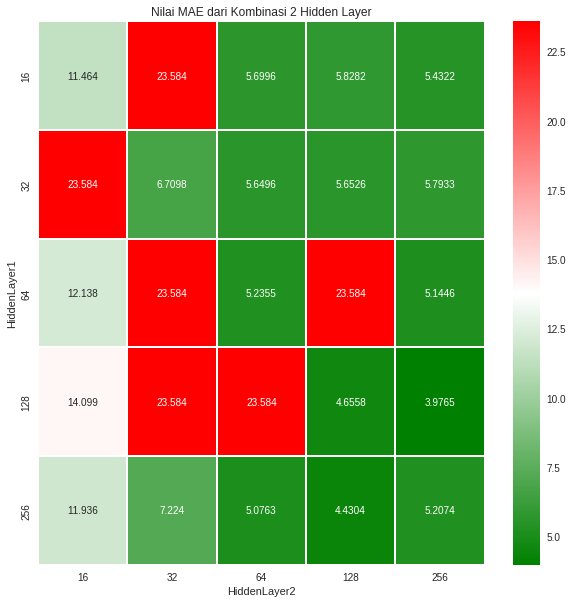

In [25]:
# Melakukan ploting nilai MAE dari beberapa kombinasi jumlah neuron hidden pada 2 hidden layer di Heatmap
plt.style.use("seaborn") 
plt.figure(figsize=(10,10))
warna_heatmap = LinearSegmentedColormap.from_list('gr',["g", "w", "r"], N=256)
heat_map = sns.heatmap(dframe_val_error, linewidth = 1 , annot = True, fmt='.5g', cmap=warna_heatmap)
heat_map.set(xlabel='HiddenLayer2', ylabel='HiddenLayer1')
plt.title( "Nilai MAE dari Kombinasi 2 Hidden Layer" )
plt.show()

## **Tahapan 6**.
Percobaan ke-4 melanjutkan proses pencarian komposisi jumlah hidden neuron pada setiap hidden layer, namun pada percobaan ini akan dipertimbangkan jumlah hidden layer sejumlah 3. Percobaan pencarian jumlah hidden neuron masih dengan lingkup pencarian yang sama (16, 32, 64, 128, 256) dan penggunaan Sigmoid Activation Function di setiap hidden layer.